## load dataset

In [56]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [12]:
drive.mount('/content/drive')
!ls /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'  'IT 3008 group project'


In [13]:
df=pd.read_excel("/content/drive/My Drive/IT 3008 group project/Data Sets/Final Data Set/merged_Final Data.xlsx")
df.head()

,BARCODE_x,ID,EXP_ID_x,GROUP_ID_x,INDIVIDUAL_ID_x,COMPOUND_NAME_x,DOSE_LEVEL_x,SACRIFICE_PERIOD,Organ_Label_x,ORGAN,...,Ca(mg/dL),IP(mg/dL),TP(g/dL),RALB(g/dL),A/G,AST(IU/L),ALT(IU/L),LDH(IU/L),GTP(IU/L),GRADE_TYPE
0,3017852005,103110,103,1,1,allyl alcohol,Control,4 day,0,Kidney,...,10.8,6.1,5.5,3.3,1.5,62.0,34.0,235.0,1.0,minimal
1,3017242022,171110,171,1,1,cyclophosphamide,Control,3 hr,0,Kidney,...,10.4,9.0,5.4,2.9,1.2,89.0,58.0,183.0,1.0,slight
2,3017714022,209111,209,1,1,amiodarone,Control,4 day,1,Liver,...,10.7,7.1,5.8,3.6,1.6,69.0,34.0,207.0,1.0,minimal
3,3017689018,234111,234,1,1,glibenclamide,Control,3 hr,1,Liver,...,10.7,8.8,5.5,3.5,1.8,92.0,55.0,225.0,1.0,minimal
4,3017178003,241110,241,1,1,methyltestosterone,Control,3 hr,0,Kidney,...,11.0,8.7,5.7,2.7,0.9,75.0,38.0,65.0,1.0,minimal


# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BARCODE_x         3364 non-null   object 
 1   ID                3364 non-null   int64  
 2   EXP_ID_x          3364 non-null   int64  
 3   GROUP_ID_x        3364 non-null   int64  
 4   INDIVIDUAL_ID_x   3364 non-null   int64  
 5   COMPOUND_NAME_x   3364 non-null   object 
 6   DOSE_LEVEL_x      3364 non-null   object 
 7   SACRIFICE_PERIOD  3364 non-null   object 
 8   Organ_Label_x     3364 non-null   int64  
 9   ORGAN             3364 non-null   object 
 10  FINDING_TYPE      3363 non-null   object 
 11  TOPOGRAPHY_TYPE   2665 non-null   object 
 12  SP_FLG            3364 non-null   bool   
 13  BARCODE_y         3364 non-null   int64  
 14  ARR_DESIGN        3364 non-null   object 
 15  EXP_ID_y          3364 non-null   int64  
 16  GROUP_ID_y        3364 non-null   int64  


In [6]:
df.describe()

,ID,EXP_ID_x,GROUP_ID_x,INDIVIDUAL_ID_x,Organ_Label_x,BARCODE_y,EXP_ID_y,GROUP_ID_y,INDIVIDUAL_ID_y,Organ_Label_y,...,Cl(meq/L),Ca(mg/dL),IP(mg/dL),TP(g/dL),RALB(g/dL),A/G,AST(IU/L),ALT(IU/L),LDH(IU/L),GTP(IU/L)
count,3.364000e+03,3364.000000,3364.000000,3364.000000,3364.000000,3.364000e+03,3364.000000,3364.000000,3364.000000,3364.000000,...,3338.00000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,2.731179e+06,370.354637,11.373662,2.983056,0.722354,3.017523e+09,404.396849,11.340963,2.983056,0.722354,...,104.72891,10.599775,7.899700,5.743478,3.273529,1.429946,90.450270,47.183343,181.541941,1.687298
std,2.273450e+06,199.905438,4.335379,1.411692,0.447904,2.576795e+05,463.524212,4.355177,1.411692,0.447904,...,2.69047,0.611695,1.680899,0.528549,0.573322,0.511578,129.498068,48.934931,400.675042,2.028074
min,6.631100e+04,40.000000,1.000000,1.000000,0.000000,3.016017e+09,40.000000,1.000000,1.000000,0.000000,...,90.00000,5.600000,3.300000,2.700000,1.000000,0.400000,15.000000,5.000000,31.000000,0.000000
25%,5.845185e+05,172.000000,9.000000,2.000000,0.000000,3.017365e+09,172.000000,8.000000,2.000000,0.000000,...,103.00000,10.360000,6.720000,5.500000,2.800000,0.980000,60.000000,32.000000,83.000000,1.000000
50%,1.861316e+06,390.500000,12.000000,3.000000,1.000000,3.017543e+09,386.000000,12.000000,3.000000,1.000000,...,105.00000,10.700000,7.700000,5.700000,3.300000,1.400000,67.000000,38.000000,135.000000,1.000000
75%,4.926486e+06,555.000000,15.000000,4.000000,1.000000,3.017721e+09,568.000000,15.000000,4.000000,1.000000,...,106.00000,10.900000,8.900000,6.000000,3.700000,1.800000,77.000000,46.000000,199.000000,2.000000
max,7.451631e+06,745.000000,24.000000,5.000000,1.000000,3.017960e+09,5341.000000,24.000000,5.000000,1.000000,...,122.00000,13.600000,21.000000,8.200000,5.300000,3.570000,3910.000000,1000.000000,17955.000000,41.000000


In [7]:
df.shape

(3364, 79)

In [8]:
categerical_column=['COMPOUND_NAME_x','DOSE_LEVEL_x','ORGAN','GRADE_TYPE','DOSE_LEVEL_x','SACRIFICE_PERIOD']

for col in categerical_column:
    print(f"--- {col} ---")
    print(df[col].unique())
    print()

--- COMPOUND_NAME_x ---
['allyl alcohol' 'cyclophosphamide' 'amiodarone' 'glibenclamide'
 'methyltestosterone' 'lomustine' 'nitrofurazone' 'terbinafine'
 'benziodarone' 'ethionamide' 'nimesulide' 'valproic acid' 'clofibrate'
 'omeprazole' 'ethionine' 'ciprofloxacin' 'enalapril' 'acarbose'
 'nitrofurantoin' 'pemoline' 'tamoxifen' 'colchicine' 'etoposide'
 'isoniazid' 'desmopressin acetate' 'indomethacin' 'flutamide' 'captopril'
 'meloxicam' 'allopurinol' 'griseofulvin' 'simvastatin'
 'hexachlorobenzene' 'aspirin' 'cimetidine' 'amitriptyline' 'ajmaline'
 'nitrosodiethylamine' 'carbamazepine' 'sulfasalazine' 'diethyl maleate'
 'acetamidofluorene' 'ethanol' 'diclofenac' 'N-nitrosomorpholine'
 'aflatoxin B1' 'chlormezanone' 'methyldopa' 'ethinylestradiol'
 'chloramphenicol' 'tannic acid' 'dantrolene' 'carbon tetrachloride'
 'phalloidin' 'bromobenzene' 'metformin' 'furosemide' 'lornoxicam'
 'bendazac' 'amphotericin B' 'mefenamic acid' 'rifampicin' 'acetazolamide'
 'WY-14643' 'gemfibrozil' 'k

In [9]:
grade_percent = df['GRADE_TYPE'].value_counts(normalize=True)*100
print(grade_percent)

GRADE_TYPE
minimal     58.590963
slight      31.629013
moderate     7.966706
severe       1.516052
P            0.297265
Name: proportion, dtype: float64


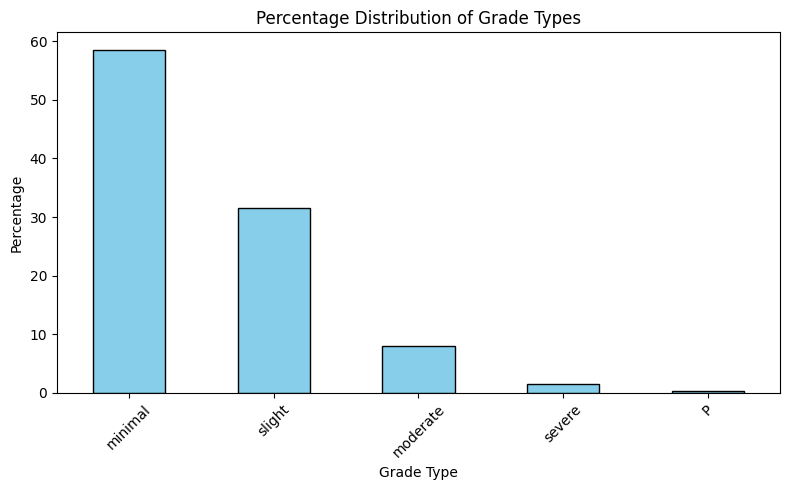

In [14]:
# Plotting
plt.figure(figsize=(8, 5))
grade_percent.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Percentage Distribution of Grade Types')
plt.xlabel('Grade Type')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
# Drop rows where 'grade' column has value 'P'
df = df[df['GRADE_TYPE'] != 'P']

In [16]:
df.isnull().sum()

,0
BARCODE_x,0
ID,0
EXP_ID_x,0
GROUP_ID_x,0
INDIVIDUAL_ID_x,0
...,...
AST(IU/L),25
ALT(IU/L),25
LDH(IU/L),25
GTP(IU/L),25


# Data Pre-processing

In [17]:
cols_to_processed = [
    'TERMINAL_BW(g)', 'LIVER(g)', 'KIDNEY_TOTAL(g)', 'RBC(x10_4/ul)', 'Hb(g/dL)', 'Ht(%)',
    'MCV(fL)', 'MCH(pg)', 'MCHC(%)', 'Ret(%)', 'Plat(x10_4/uL)', 'WBC(x10_2/uL)',
    'Neu(%)', 'Eos(%)', 'Bas(%)', 'Mono(%)', 'Lym(%)',
    'PT(s)', 'APTT(s)', 'Fbg(mg/dL)',
    'ALP(IU/L)', 'TC(mg/dL)', 'TG(mg/dL)', 'PL(mg/dL)', 'TBIL(mg/dL)', 'DBIL(mg/dL)',
    'GLC(mg/dL)', 'BUN(mg/dL)', 'CRE(mg/dL)', 'Na(meq/L)', 'K(meq/L)', 'Cl(meq/L)',
    'Ca(mg/dL)', 'IP(mg/dL)', 'TP(g/dL)', 'RALB(g/dL)', 'A/G',
    'AST(IU/L)', 'ALT(IU/L)', 'LDH(IU/L)', 'GTP(IU/L)','GROUP_ID_y','EXP_ID_y','INDIVIDUAL_ID_y'
]


In [19]:
# Initialize the imputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform only the selected columns
df[cols_to_processed] = imputer.fit_transform(df[cols_to_processed])

print(df[cols_to_processed].isnull().sum())

TERMINAL_BW(g)     0
LIVER(g)           0
KIDNEY_TOTAL(g)    0
RBC(x10_4/ul)      0
Hb(g/dL)           0
Ht(%)              0
MCV(fL)            0
MCH(pg)            0
MCHC(%)            0
Ret(%)             0
Plat(x10_4/uL)     0
WBC(x10_2/uL)      0
Neu(%)             0
Eos(%)             0
Bas(%)             0
Mono(%)            0
Lym(%)             0
PT(s)              0
APTT(s)            0
Fbg(mg/dL)         0
ALP(IU/L)          0
TC(mg/dL)          0
TG(mg/dL)          0
PL(mg/dL)          0
TBIL(mg/dL)        0
DBIL(mg/dL)        0
GLC(mg/dL)         0
BUN(mg/dL)         0
CRE(mg/dL)         0
Na(meq/L)          0
K(meq/L)           0
Cl(meq/L)          0
Ca(mg/dL)          0
IP(mg/dL)          0
TP(g/dL)           0
RALB(g/dL)         0
A/G                0
AST(IU/L)          0
ALT(IU/L)          0
LDH(IU/L)          0
GTP(IU/L)          0
GROUP_ID_y         0
EXP_ID_y           0
INDIVIDUAL_ID_y    0
dtype: int64


In [25]:
## Data Normalizing
scaler = StandardScaler()

# Fit and transform the selected columns
df[cols_to_processed] = scaler.fit_transform(df[cols_to_processed])


In [26]:
# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Remove the target column from feature lists
cat_cols = [col for col in cat_cols if col != 'GRADE_TYPE']
num_cols = [col for col in num_cols if col != 'GRADE_TYPE']

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['BARCODE_x', 'COMPOUND_NAME_x', 'DOSE_LEVEL_x', 'SACRIFICE_PERIOD', 'ORGAN', 'FINDING_TYPE', 'TOPOGRAPHY_TYPE', 'ARR_DESIGN', 'ORGAN_ID', 'MATERIAL_ID', 'COMPOUND_NAME_y', 'COMPOUND Abbr.', 'COMPOUND_NO', 'SPECIES', 'TEST_TYPE', 'SIN_REP_TYPE', 'SEX_TYPE', 'STRAIN_TYPE', 'ADM_ROUTE_TYPE', 'SACRI_PERIOD', 'DOSE_UNIT', 'DOSE_LEVEL_y']
Numerical columns: ['ID', 'EXP_ID_x', 'GROUP_ID_x', 'INDIVIDUAL_ID_x', 'Organ_Label_x', 'BARCODE_y', 'EXP_ID_y', 'GROUP_ID_y', 'INDIVIDUAL_ID_y', 'Organ_Label_y', 'ANIMAL_AGE(week)', 'DOSE', 'TERMINAL_BW(g)', 'LIVER(g)', 'KIDNEY_TOTAL(g)', 'KIDNEY_R(g)', 'KIDNEY_L(g)', 'RBC(x10_4/ul)', 'Hb(g/dL)', 'Ht(%)', 'MCV(fL)', 'MCH(pg)', 'MCHC(%)', 'Ret(%)', 'Plat(x10_4/uL)', 'WBC(x10_2/uL)', 'Neu(%)', 'Eos(%)', 'Bas(%)', 'Mono(%)', 'Lym(%)', 'PT(s)', 'APTT(s)', 'Fbg(mg/dL)', 'ALP(IU/L)', 'TC(mg/dL)', 'TG(mg/dL)', 'PL(mg/dL)', 'TBIL(mg/dL)', 'DBIL(mg/dL)', 'GLC(mg/dL)', 'BUN(mg/dL)', 'CRE(mg/dL)', 'Na(meq/L)', 'K(meq/L)', 'Cl(meq/L)', 'Ca(mg/dL)

### feature engineering

In [29]:
##for categerical features

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Apply to each categorical feature
for col in cat_cols:
    score = cramers_v(df[col], df['GRADE_TYPE'])
    print(f"Cramér's V between {col} and grade: {round(score, 3)}")


Cramér's V between BARCODE_x and grade: 0.081
Cramér's V between COMPOUND_NAME_x and grade: 0.511
Cramér's V between DOSE_LEVEL_x and grade: 0.162
Cramér's V between SACRIFICE_PERIOD and grade: 0.1
Cramér's V between ORGAN and grade: 0.115
Cramér's V between FINDING_TYPE and grade: 0.383
Cramér's V between TOPOGRAPHY_TYPE and grade: 0.284
Cramér's V between ARR_DESIGN and grade: 0.0
Cramér's V between ORGAN_ID and grade: 0.115
Cramér's V between MATERIAL_ID and grade: 0.073
Cramér's V between COMPOUND_NAME_y and grade: 0.508
Cramér's V between COMPOUND Abbr. and grade: 0.508
Cramér's V between COMPOUND_NO and grade: 0.508
Cramér's V between SPECIES and grade: 0.0
Cramér's V between TEST_TYPE and grade: 0.0
Cramér's V between SIN_REP_TYPE and grade: 0.092
Cramér's V between SEX_TYPE and grade: 0.0
Cramér's V between STRAIN_TYPE and grade: 0.0
Cramér's V between ADM_ROUTE_TYPE and grade: 0.098
Cramér's V between SACRI_PERIOD and grade: 0.104
Cramér's V between DOSE_UNIT and grade: 0.042


Values closer to 1 = strong association.
Closer to 0 = weak association.

/tmp/ipython-input-30-125521272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cramers_df, x='Cramers_V', y='Feature', palette='viridis')


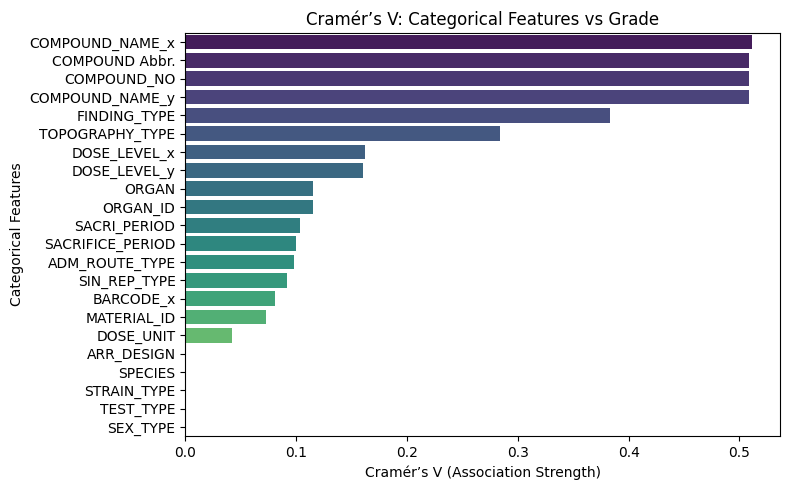

In [30]:
# Calculate Cramér's V scores
cramers_scores = []
for col in cat_cols:
    score = cramers_v(df[col], df['GRADE_TYPE'])
    cramers_scores.append((col, score))

# Convert to DataFrame for plotting
cramers_df = pd.DataFrame(cramers_scores, columns=['Feature', 'Cramers_V']).sort_values(by='Cramers_V', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=cramers_df, x='Cramers_V', y='Feature', palette='viridis')
plt.title("Cramér’s V: Categorical Features vs Grade")
plt.xlabel("Cramér’s V (Association Strength)")
plt.ylabel("Categorical Features")
plt.tight_layout()
plt.show()


In [31]:
missing_values = df[num_cols].isnull().sum()
print(missing_values[missing_values > 0])


ANIMAL_AGE(week)    25
KIDNEY_R(g)         46
KIDNEY_L(g)         46
dtype: int64


In [32]:
# Drop numerical columns that contain any NaN values
df = df.dropna(axis=1, how='any')


In [33]:
# Re-identify numerical columns (after dropping)
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# Remove the target if still present
if 'GRADE_TYPE' in num_cols:
    num_cols.remove('GRADE_TYPE')

# Prepare inputs
X_num = df[num_cols]
y = df['GRADE_TYPE']

# Run f_classif
from sklearn.feature_selection import f_classif
f_scores, p_values = f_classif(X_num, y)

# Display F-scores
for col, score in zip(num_cols, f_scores):
    print(f"F-score between {col} and grade: {round(score, 2)}")


F-score between ID and grade: 59.52
F-score between EXP_ID_x and grade: 23.43
F-score between GROUP_ID_x and grade: 60.87
F-score between INDIVIDUAL_ID_x and grade: 0.29
F-score between Organ_Label_x and grade: 16.06
F-score between BARCODE_y and grade: 5.04
F-score between EXP_ID_y and grade: 5.26
F-score between GROUP_ID_y and grade: 57.26
F-score between INDIVIDUAL_ID_y and grade: 0.29
F-score between Organ_Label_y and grade: 16.06
F-score between DOSE and grade: 8.83
F-score between TERMINAL_BW(g) and grade: 6.79
F-score between LIVER(g) and grade: 72.4
F-score between KIDNEY_TOTAL(g) and grade: 30.06
F-score between RBC(x10_4/ul) and grade: 19.68
F-score between Hb(g/dL) and grade: 7.91
F-score between Ht(%) and grade: 12.03
F-score between MCV(fL) and grade: 47.55
F-score between MCH(pg) and grade: 35.74
F-score between MCHC(%) and grade: 19.64
F-score between Ret(%) and grade: 16.83
F-score between Plat(x10_4/uL) and grade: 3.19
F-score between WBC(x10_2/uL) and grade: 7.49
F-sc

In [34]:
##for neumerical features
X_num = df[num_cols]
y = df['GRADE_TYPE']  # assuming still categorical

f_scores, p_values = f_classif(X_num, y)

for col, score in zip(num_cols, f_scores):
    print(f"F-score between {col} and grade: {round(score, 2)}")


F-score between ID and grade: 59.52
F-score between EXP_ID_x and grade: 23.43
F-score between GROUP_ID_x and grade: 60.87
F-score between INDIVIDUAL_ID_x and grade: 0.29
F-score between Organ_Label_x and grade: 16.06
F-score between BARCODE_y and grade: 5.04
F-score between EXP_ID_y and grade: 5.26
F-score between GROUP_ID_y and grade: 57.26
F-score between INDIVIDUAL_ID_y and grade: 0.29
F-score between Organ_Label_y and grade: 16.06
F-score between DOSE and grade: 8.83
F-score between TERMINAL_BW(g) and grade: 6.79
F-score between LIVER(g) and grade: 72.4
F-score between KIDNEY_TOTAL(g) and grade: 30.06
F-score between RBC(x10_4/ul) and grade: 19.68
F-score between Hb(g/dL) and grade: 7.91
F-score between Ht(%) and grade: 12.03
F-score between MCV(fL) and grade: 47.55
F-score between MCH(pg) and grade: 35.74
F-score between MCHC(%) and grade: 19.64
F-score between Ret(%) and grade: 16.83
F-score between Plat(x10_4/uL) and grade: 3.19
F-score between WBC(x10_2/uL) and grade: 7.49
F-sc

Higher F-score = stronger discriminatory power
You can also look at p-values to check significance

In [35]:
# Create a DataFrame with feature names and their corresponding F-scores
anova_df = pd.DataFrame({'Feature': num_cols, 'F_Score': f_scores})

# Sort by F-scores in descending order
anova_df = anova_df.sort_values(by='F_Score', ascending=False)

# Display the sorted F-scores
print(anova_df)

# Select the top N features (for example, top 5 features)
top_n_features = anova_df.head(5)['Feature'].tolist()

# Select the dataset with top features
X_selected = X_num[top_n_features]

print("Selected features:", top_n_features)


            Feature     F_Score
28            PT(s)  149.980081
29          APTT(s)   95.644800
30       Fbg(mg/dL)   83.686835
39       CRE(mg/dL)   83.362465
12         LIVER(g)   72.404476
2        GROUP_ID_x   60.870791
0                ID   59.520018
7        GROUP_ID_y   57.260731
17          MCV(fL)   47.552675
31        ALP(IU/L)   43.677774
46       RALB(g/dL)   42.434339
47              A/G   36.965053
18          MCH(pg)   35.736505
38       BUN(mg/dL)   30.708144
13  KIDNEY_TOTAL(g)   30.061837
37       GLC(mg/dL)   29.001245
23           Neu(%)   26.114336
42        Cl(meq/L)   24.592531
1          EXP_ID_x   23.431451
43        Ca(mg/dL)   21.855065
40        Na(meq/L)   20.564988
14    RBC(x10_4/ul)   19.683763
19          MCHC(%)   19.641559
51        GTP(IU/L)   18.104109
32        TC(mg/dL)   17.227523
27           Lym(%)   17.177519
20           Ret(%)   16.826895
9     Organ_Label_y   16.063372
4     Organ_Label_x   16.063372
16            Ht(%)   12.031304
26      

/tmp/ipython-input-37-3845125700.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_df, x='F_Score', y='Feature', palette='mako')


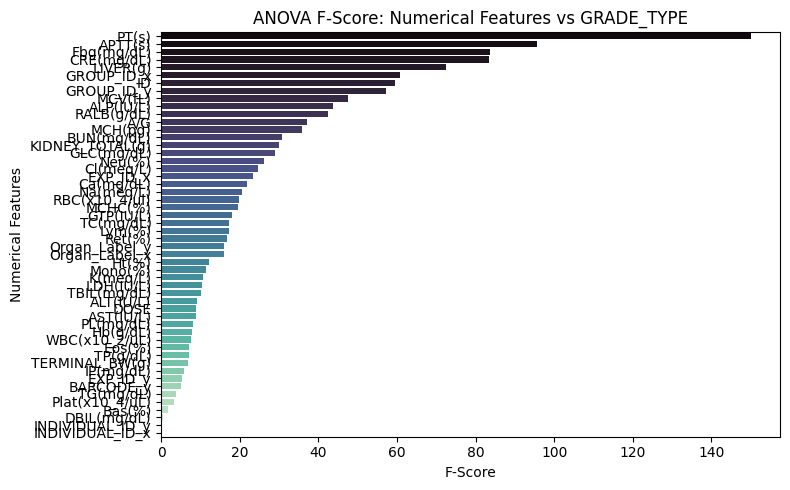

In [37]:
##ANOVA F-Score Plot
anova_df = pd.DataFrame({'Feature': num_cols, 'F_Score': f_scores}).sort_values(by='F_Score', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=anova_df, x='F_Score', y='Feature', palette='mako')
plt.title("ANOVA F-Score: Numerical Features vs GRADE_TYPE")
plt.xlabel("F-Score")
plt.ylabel("Numerical Features")
plt.tight_layout()
plt.show()


### Ranking Feature importance with LR & RF

In [39]:
### RFE (Recursive Feature Elimination) method

# Initialize the model
model = LogisticRegression()

# Apply RFE (recursive feature elimination)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X_num, y)

# Get the ranking of features
ranking = pd.DataFrame({'Feature': num_cols, 'Ranking': rfe.ranking_})
ranking = ranking.sort_values(by='Ranking', ascending=True)

# Display the ranking
print(ranking)

# Select the top features based on RFE
top_rfe_features = ranking.head(5)['Feature'].tolist()
print("Top features selected by RFE:", top_rfe_features)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

            Feature  Ranking
0                ID        1
1          EXP_ID_x        1
2        GROUP_ID_x        1
5         BARCODE_y        1
10             DOSE        1
28            PT(s)        2
29          APTT(s)        3
39       CRE(mg/dL)        4
30       Fbg(mg/dL)        5
31        ALP(IU/L)        6
17          MCV(fL)        7
47              A/G        8
42        Cl(meq/L)        9
18          MCH(pg)       10
46       RALB(g/dL)       11
37       GLC(mg/dL)       12
40        Na(meq/L)       13
43        Ca(mg/dL)       14
26          Mono(%)       15
35      TBIL(mg/dL)       16
12         LIVER(g)       17
7        GROUP_ID_y       18
23           Neu(%)       19
50        LDH(IU/L)       20
38       BUN(mg/dL)       21
13  KIDNEY_TOTAL(g)       22
14    RBC(x10_4/ul)       23
20           Ret(%)       24
41         K(meq/L)       25
51        GTP(IU/L)       26
32        TC(mg/dL)       27
48        AST(IU/L)       28
49        ALT(IU/L)       29
24           E

In [42]:
## Tree based model
# Train a Random Forest model
rf = RandomForestClassifier()
rf.fit(X_num, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': num_cols, 'Importance': importances})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted importance
print(importance_df)

# Select the top N features (for example, top 5 features)
top_rf_features = importance_df.head(5)['Feature'].tolist()

print("Top features selected by Random Forest:", top_rf_features)


            Feature  Importance
28            PT(s)    0.061423
35      TBIL(mg/dL)    0.043944
0                ID    0.040584
29          APTT(s)    0.038417
50        LDH(IU/L)    0.038347
30       Fbg(mg/dL)    0.036884
12         LIVER(g)    0.030601
47              A/G    0.029072
1          EXP_ID_x    0.028370
39       CRE(mg/dL)    0.028032
5         BARCODE_y    0.027397
36      DBIL(mg/dL)    0.027048
6          EXP_ID_y    0.024380
31        ALP(IU/L)    0.023093
46       RALB(g/dL)    0.020362
32        TC(mg/dL)    0.019637
34        PL(mg/dL)    0.019202
49        ALT(IU/L)    0.018600
33        TG(mg/dL)    0.018103
13  KIDNEY_TOTAL(g)    0.017975
2        GROUP_ID_x    0.017603
37       GLC(mg/dL)    0.017232
20           Ret(%)    0.016944
10             DOSE    0.016714
21   Plat(x10_4/uL)    0.016674
14    RBC(x10_4/ul)    0.016579
19          MCHC(%)    0.016564
17          MCV(fL)    0.016449
48        AST(IU/L)    0.016024
11   TERMINAL_BW(g)    0.015754
22    WB

### Heat map

In [43]:
#encode the categerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['grade_encoded'] = le.fit_transform(df['GRADE_TYPE'])
df['compound_name_encoded']=le.fit_transform(df['COMPOUND_NAME_x'])


In [44]:
new_df=df[cols_to_processed+['grade_encoded']+['compound_name_encoded']]

In [45]:
heatmap_df = new_df.drop('compound_name_encoded', axis=1)

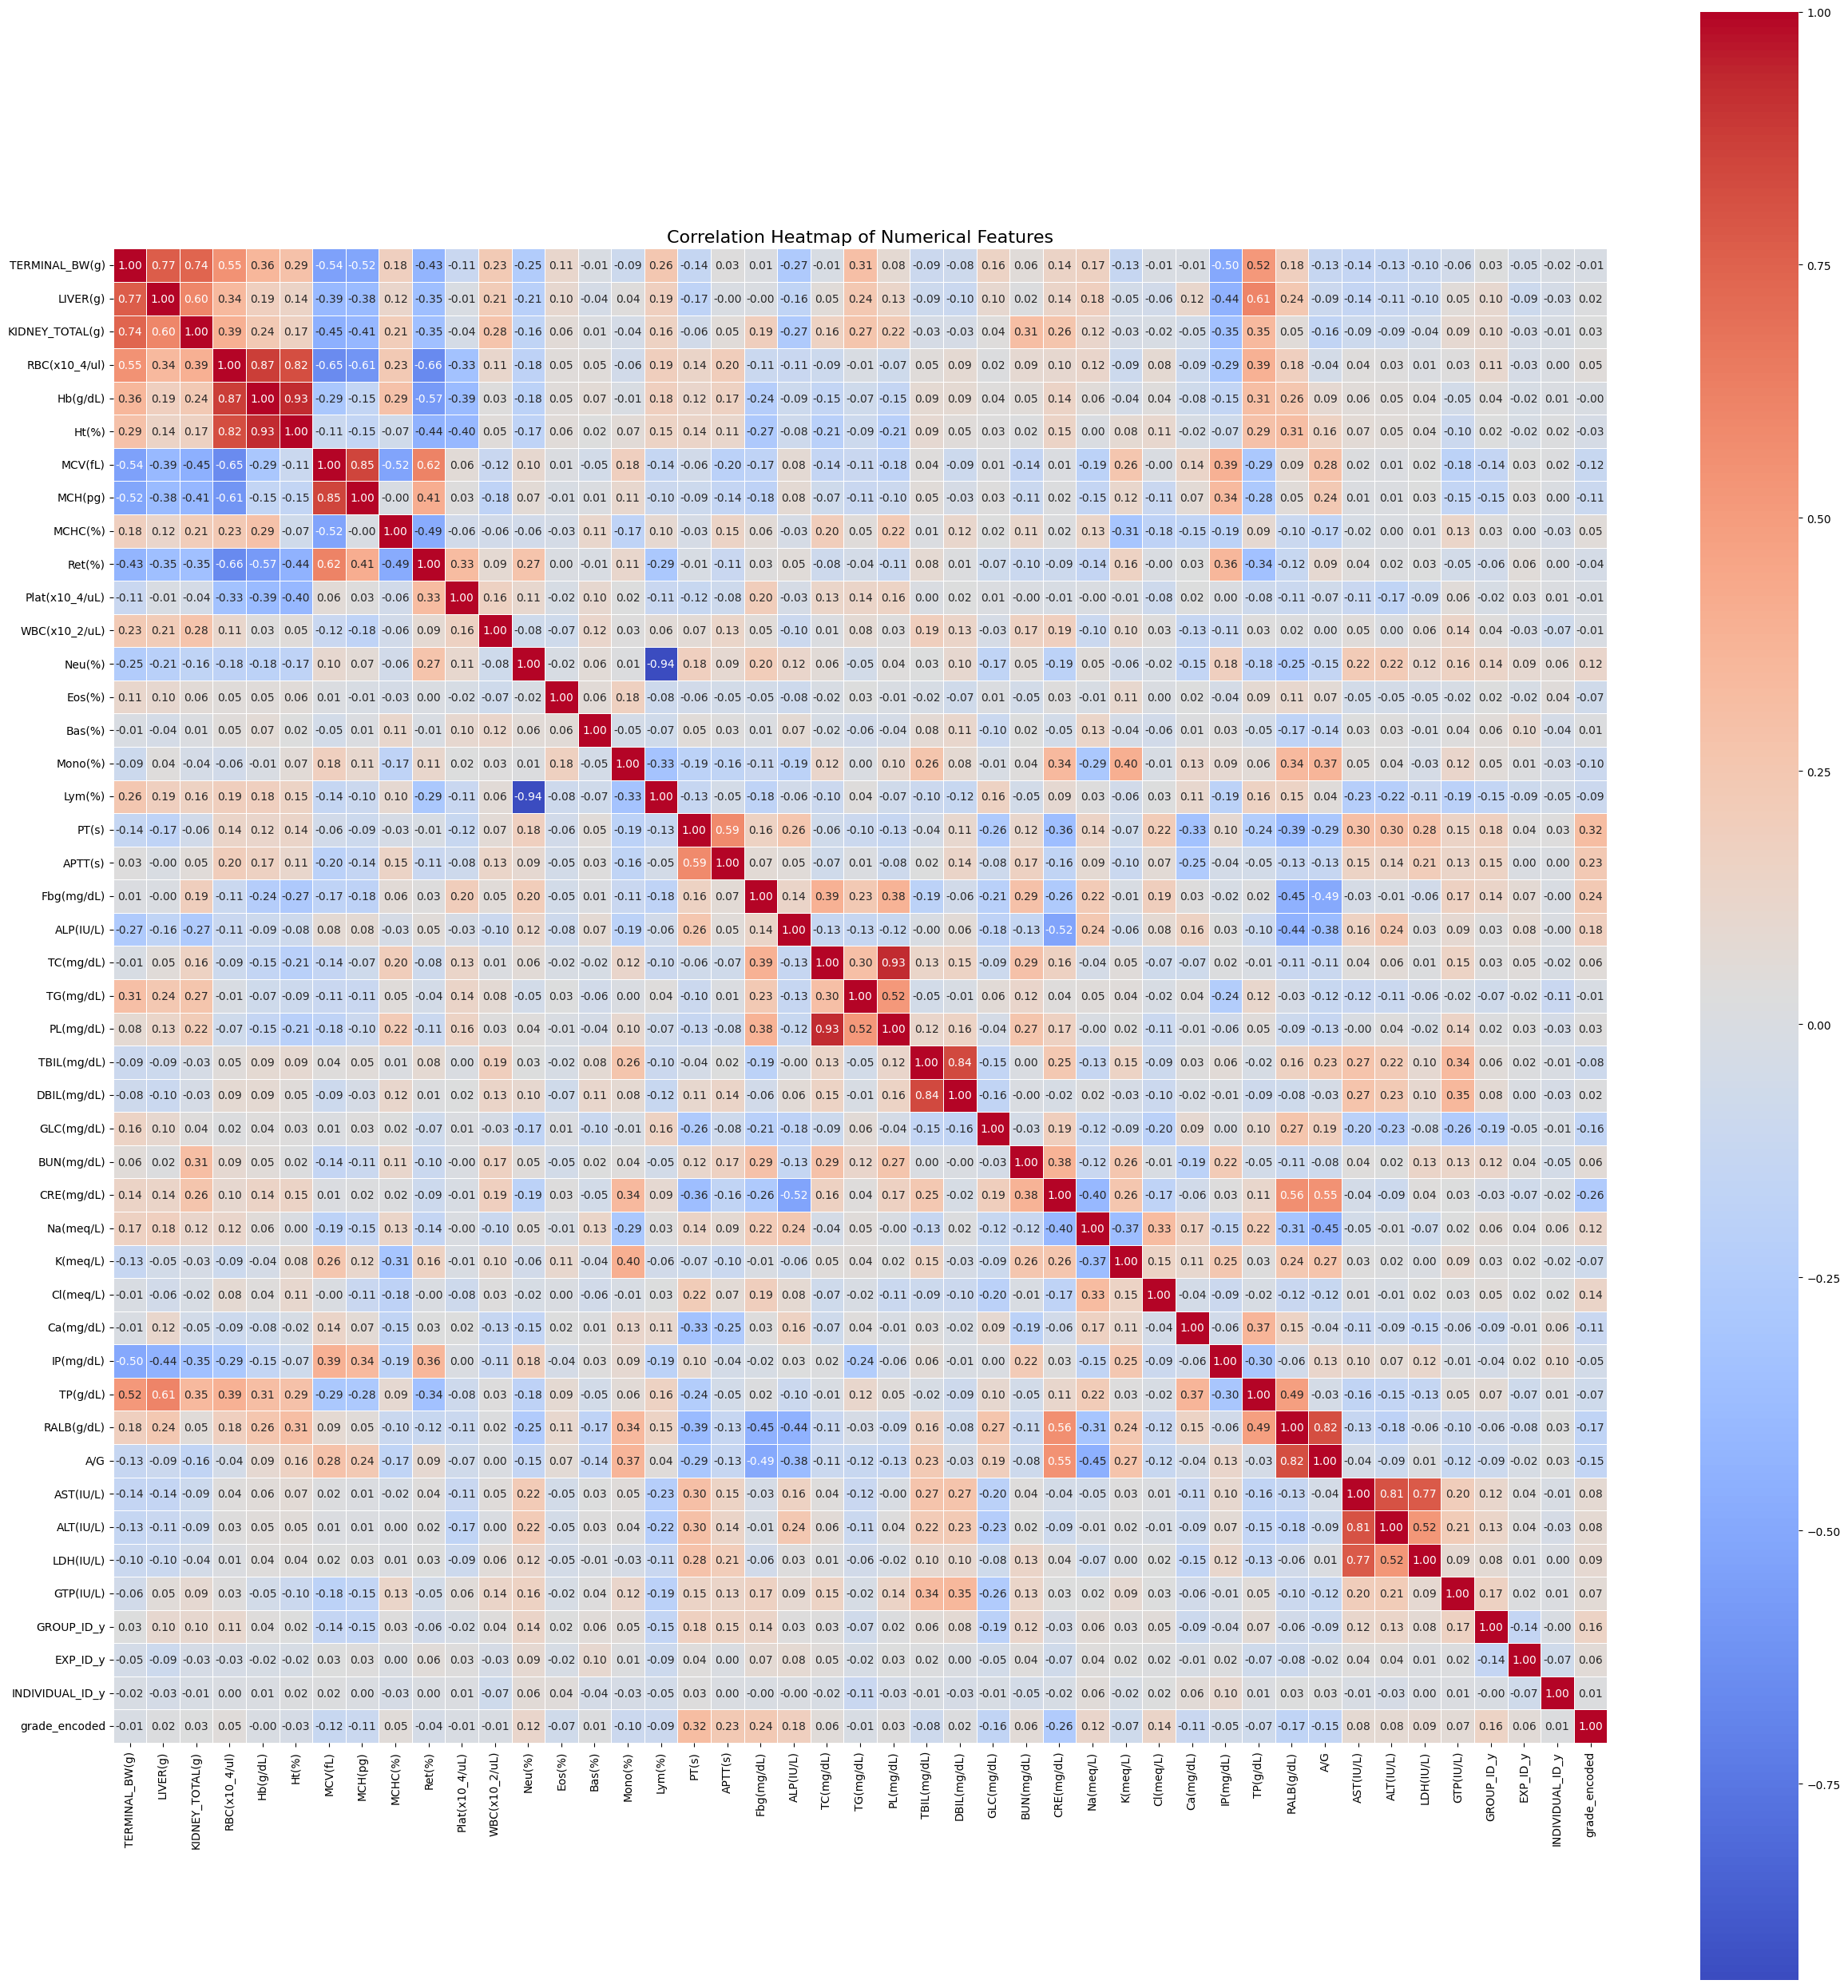

In [46]:
corr_matrix = heatmap_df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [48]:
#set the dataset balance with SMOTE

X = new_df[['compound_name_encoded', 'PT(s)', 'APTT(s)', 'Fbg(mg/dL)', 'LIVER(g)', 'CRE(mg/dL)',
        'GROUP_ID_y','RALB(g/dL)','EXP_ID_y','A/G','MCV(fL)','MCH(pg)','Neu(%)','ALP(IU/L)','GLC(mg/dL)','Na(meq/L)','Ca(mg/dL)']]

Y = new_df['grade_encoded']  # label

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)


In [49]:
pd.Series(y_resampled).value_counts()

,count
grade_encoded,
0,1971
3,1971
1,1971
2,1971


In [51]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (2683, 17)
Test set size: (671, 17)


# Train a model

 Random Forest Report:
Accuracy: 0.7615499254843517
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       394
           1       0.53      0.19      0.27        54
           2       0.67      0.40      0.50        10
           3       0.69      0.62      0.65       213

    accuracy                           0.76       671
   macro avg       0.67      0.53      0.57       671
weighted avg       0.74      0.76      0.74       671



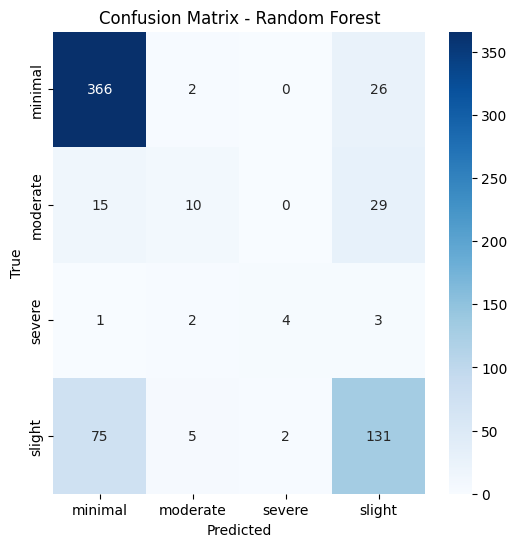

In [53]:
# Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print(" Random Forest Report:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

cm_RFC = confusion_matrix(y_test, rf_preds)

class_labels = sorted(df['GRADE_TYPE'].unique())

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest")
plt.show()




 SVM
Accuracy: 0.5886736214605067
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       394
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        10
           3       1.00      0.00      0.01       213

    accuracy                           0.59       671
   macro avg       0.40      0.25      0.19       671
weighted avg       0.66      0.59      0.44       671



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


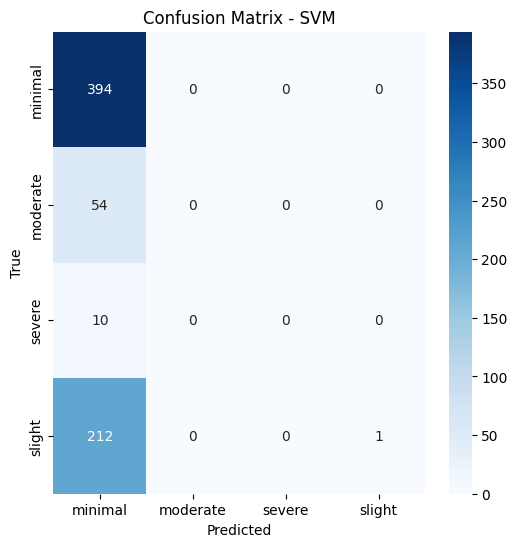

In [54]:
# Support Vector Machine (SVM)
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

print("\n SVM")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))

cm_SVM = confusion_matrix(y_test, svm_preds)

class_labels = sorted(df['GRADE_TYPE'].unique())

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_SVM, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:54:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       394
           1       0.50      0.24      0.33        54
           2       0.62      0.50      0.56        10
           3       0.67      0.65      0.66       213

    accuracy                           0.76       671
   macro avg       0.65      0.57      0.60       671
weighted avg       0.74      0.76      0.75       671

Accuracy: 0.7600596125186289


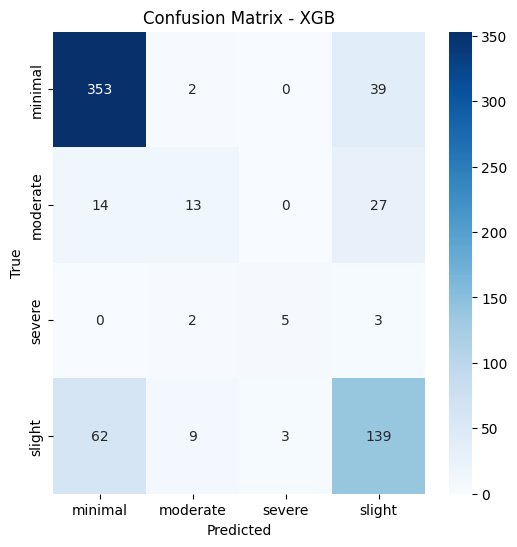

In [55]:
# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("\n XGBoost Report:")
print(classification_report(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))

cm_xgb = confusion_matrix(y_test, xgb_preds)

class_labels = sorted(df['GRADE_TYPE'].unique())

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - XGB")
plt.show()

### Fine tuning Part

In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)
print("Best Parameters Found:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

from sklearn.metrics import accuracy_score

y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print("Best Accuracy after Tuning:", round(best_accuracy * 100, 2), "%")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py

Best Parameters Found: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy after Tuning: 97.32 %


Final Random Forest Evaluation
Accuracy: 97.32 %

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       394
           1       0.95      1.00      0.97        54
           2       0.83      1.00      0.91        10
           3       0.97      0.95      0.96       213

    accuracy                           0.97       671
   macro avg       0.93      0.98      0.96       671
weighted avg       0.97      0.97      0.97       671



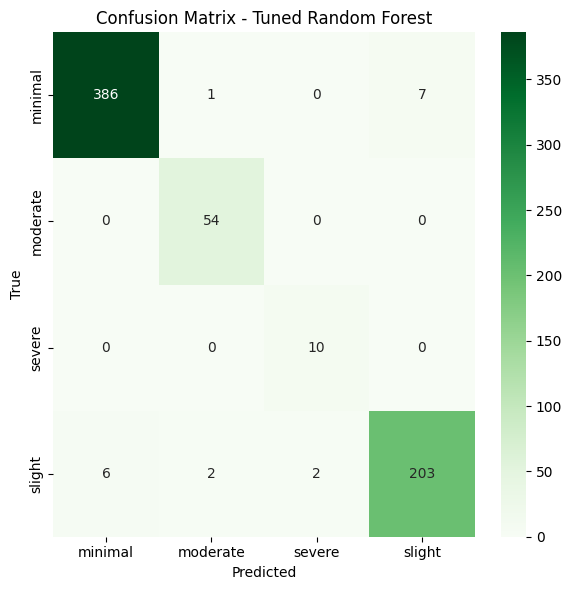

In [ ]:
# Train model with Best parameters found
best_params = {
    'bootstrap': True,
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}

# Retrain the Random Forest model using best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = best_rf.predict(X_test)

# Accuracy and classification report
print("Final Random Forest Evaluation")
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(df['GRADE_TYPE'].unique())

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.tight_layout()
plt.show()
